## Actividad 3_10

<div style="border-style:groove;border-width:thin;padding:10px">

En esta actividad vamos a tratar de solucionar un problema mediante clasificación, aunque también podría tratarse como regresión. 
Se trata de un dataset de valoración de vinos. 

<p style="border-style:groove;border-width:thin;padding:10px">
Lo primero que vamos a hacer es importar los datos y analizar el dataset que tenemos.
</p>

In [33]:
import pandas as pd
vinos = pd.read_csv('winequalityN.csv')
vinos.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [34]:
vinos['quality'].unique()

media_quality = vinos["quality"].mean()
calidad = []
for index, row in vinos.iterrows():
    if row["quality"] != row["quality"]:
        calidad.append(media_quality)
    else:
        calidad.append(row["quality"])

vinos["quality"] = calidad

df_dummies = pd.get_dummies(vinos, dtype=int)

Características del dataset:
<ul>
<li>La columna quality nos da la puntuación de calidad que le dan al vino. Queremos predecirla en función de las características del vino. </li>
<li>Tenemos, además de nulos, 7 posibles valores. Se podría hacer como un problema de regresión o como uno de clasificación de 7 clases.</li>
</ul>
</div>

Prepara el dataset para poder resolverlo con los dos algoritmos de clasificación que hemos visto, decision tree y SVC. Cuidado con los nulos, trátalos de la forma adecuada. Haz la correlación de las variables con la variable objetivo para ir intuyendo lo que podremos conseguir. Trabaja con los hiperparámetros para conseguir el mejor resultado posible. Valora los resultados y haz los cambios que consideres oportunos.

In [35]:
## Definiendo cual es la X, y cual es la Y
X = df_dummies.drop('quality', axis=1)
y = df_dummies['quality'].astype(int)

# Decision Tree

In [70]:
## Dividiendo el entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [86]:
#Entrenando el modelo
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=1000, random_state=42)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1000, random_state=42)

In [87]:
y_pred = treeclf.predict(X_test)
print(y_pred)

[7 5 6 ... 5 6 6]


In [88]:
# Viendo precision del modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6246153846153846

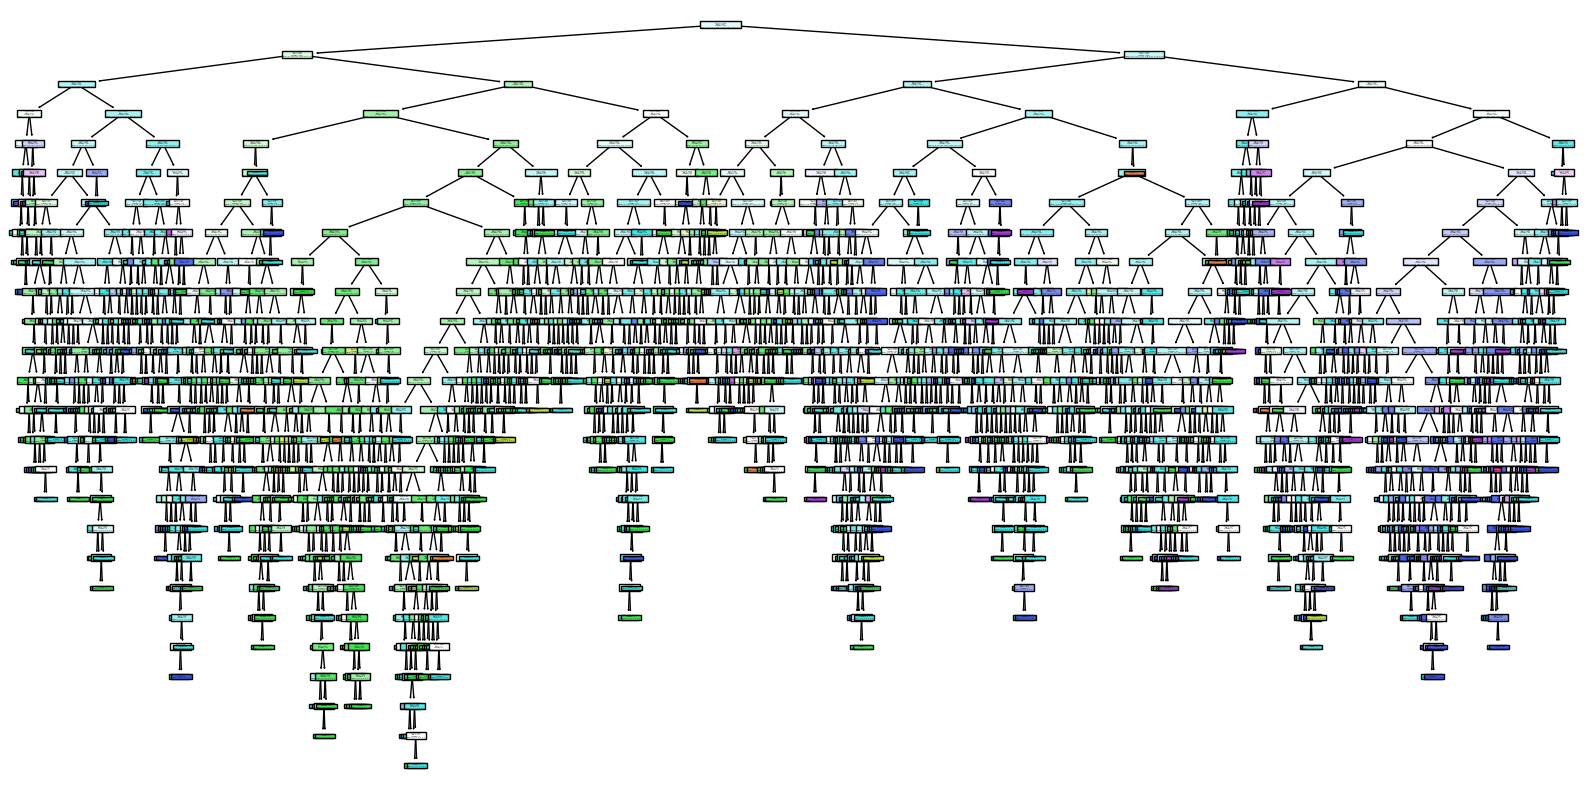

In [89]:
# Visualizar el arbol
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(treeclf, filled=True)
plt.show()

# SVC

In [98]:
## Preparar datos para SVM
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df_dummies.drop('quality', axis=1).fillna(X.mean())
X_scaled = scaler.fit_transform(X)
y = df_dummies['quality'].astype(int)

In [99]:
## Dividir datos para SVM
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42)

In [ ]:
## Crear y entrenar SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

#svc_model = Pipeline([
#    ('scaler', StandardScaler()),
#    ('svc', SVC(kernel='rbf', C=50, gamma="auto", random_state=42))
#])

svc_model = SVC(kernel='rbf', C=50, gamma=2, random_state=42)

# Entrenamiento
svc_model.fit(X_train_svc, y_train_svc)

SVC(C=50, gamma=2, random_state=42)

In [146]:
## Prediciendo con el modelo SVM y evaluando su precisión
y_pred_svc = svc_model.predict(X_test_svc)
print(y_pred_svc)
print(f"Precisión SVC: {accuracy_score(y_test_svc, y_pred_svc)}")

[7 6 6 ... 5 6 5]
Precisión SVC: 0.6553846153846153
